In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load dataset
df = pd.read_csv("/content/Solar Power Plant Data (1).csv")

# Step 2: Split 'Date-Hour(NMT)' into datetime
df['datetime'] = pd.to_datetime(df['Date-Hour(NMT)'], format='%d.%m.%Y-%H:%M')

# Step 3: Extract date components
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['hour'] = df['datetime'].dt.hour

# Step 4: Drop original date column
df = df.drop(columns=['Date-Hour(NMT)', 'datetime'])

# Step 5: Reorder columns if needed
cols = df.columns.tolist()
df = df[cols]  # optional, reorder if you want day/month/hour at start

# Step 6: Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Preview
print(df_scaled.head())


   WindSpeed  Sunshine  AirPressure  Radiation  AirTemperature  \
0   0.055046       0.0     0.465602    0.00209        0.316456   
1   0.155963       0.0     0.461916    0.00209        0.308861   
2   0.055046       0.0     0.460688    0.00286        0.283544   
3   0.220183       0.0     0.459459    0.00231        0.281013   
4   0.366972       0.0     0.457002    0.00330        0.405063   

   RelativeAirHumidity  SystemProduction  day  month      hour  
0             0.965517               0.0  0.0    0.0  0.000000  
1             0.977011               0.0  0.0    0.0  0.043478  
2             0.988506               0.0  0.0    0.0  0.086957  
3             0.988506               0.0  0.0    0.0  0.130435  
4             0.620690               0.0  0.0    0.0  0.173913  


/tmp/ipython-input-2-388788215.py:18: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


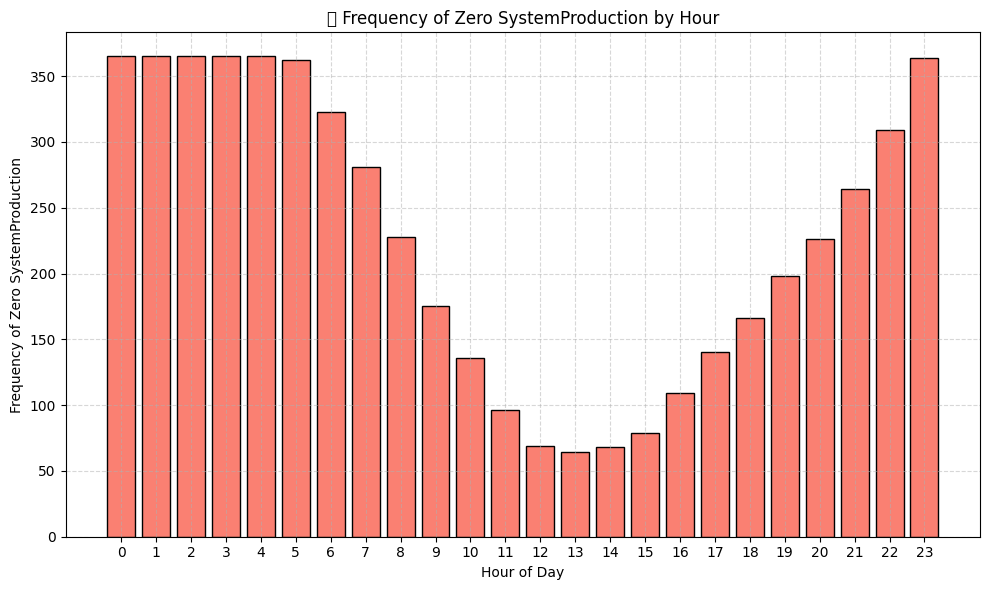

In [ ]:
import matplotlib.pyplot as plt


# Step 3: Filter where SystemProduction is 0
df_zero_output = df[df['SystemProduction'] == 0]

# Step 4: Count zero outputs per hour
zero_hour_counts = df_zero_output['hour'].value_counts().sort_index()

# Step 5: Plot histogram of zero SystemProduction over hours
plt.figure(figsize=(10, 6))
plt.bar(zero_hour_counts.index, zero_hour_counts.values, color='salmon', edgecolor='black')
plt.xlabel("Hour of Day")
plt.ylabel("Frequency of Zero SystemProduction")
plt.title("🔋 Frequency of Zero SystemProduction by Hour")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
# Remove rows where hour is in [0, 1, 2, 3, 4, 23]
df_filtered = df[~df['hour'].isin([0, 1, 2, 3, 4, 23])].reset_index(drop=True)

print(f"✅ Filtered data shape: {df_filtered.shape}")

✅ Filtered data shape: (6570, 10)


In [ ]:
df = df_filtered
df.head(5)

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,day,month,hour
0,1.4,0,1003.1,-6.8,1.5,74,0.0,1,1,5
1,1.4,0,1003.7,-7.0,0.4,79,0.0,1,1,6
2,1.3,0,1003.9,-7.0,-0.9,81,0.0,1,1,7
3,0.6,0,1004.3,-6.6,-1.0,77,0.0,1,1,8
4,0.6,0,1004.8,-6.5,-2.0,81,0.0,1,1,9


In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Define columns ===
target_col = 'SystemProduction'
feature_cols = [col for col in df.columns if col != target_col]

# === Step 2: Fit and apply scalers ===
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

data_X_raw = scalerX.fit_transform(df[feature_cols])
data_Y_raw = scalerY.fit_transform(df[[target_col]])  # keep 2D shape

# === Step 3: Round to 10 decimal places ===
data_X = np.round(data_X_raw, decimals=10)
data_Y = np.round(data_Y_raw, decimals=10)

# === Step 4: Save scalers ===
joblib.dump(scalerX, 'scalerX_.save')
joblib.dump(scalerY, 'scalerY_.save')

# === Step 5: Create sequences ===
sequence_length = 2
X = []
y = []

for i in range(len(df) - sequence_length):
    X_seq = data_X[i:i + sequence_length]      # shape: (seq_len, n_features)
    y_target = data_Y[i + sequence_length]     # shape: (1,)
    X.append(X_seq)
    y.append(y_target)

# === Step 6: Convert to numpy arrays ===
X = np.array(X)
y = np.array(y)

# === Step 7: Print shape info ===
print(f"✅ X shape: {X.shape} → (n_samples, {sequence_length}, {len(feature_cols)})")
print(f"✅ y shape: {y.shape} → (n_samples, 1)")


✅ X shape: (6568, 2, 9) → (n_samples, 2, 9)
✅ y shape: (6568, 1) → (n_samples, 1)


In [ ]:
X[3:4]

array([[[0.05504587, 0.        , 0.4729064 , 0.0029703 , 0.28860759,
         0.73563218, 0.        , 0.        , 0.17647059],
        [0.05504587, 0.        , 0.47906404, 0.00308031, 0.26329114,
         0.7816092 , 0.        , 0.        , 0.23529412]]])

In [ ]:
y[3:4]

array([[0.]])

In [ ]:
X_array.shape[1]

2

In [ ]:
X_array.shape[2]

9

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# === STEP 1: Convert list-based data to NumPy arrays ===
X_array = np.array(X)  # X is a list of sequences
y_array = np.array(y)  # y is a list of scalar targets (solar production)

# === STEP 2: Split into train and validation sets ===
X_train, X_val, y_train, y_val = train_test_split(
    X_array, y_array, test_size=0.05, random_state=42
)

# === STEP 3: Custom Attention Layer ===
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def call(self, encoder_outputs, decoder_hidden):
        # encoder_outputs: (batch, seq_len, hidden_dim)
        # decoder_hidden: (batch, hidden_dim)
        score = tf.matmul(encoder_outputs, tf.expand_dims(decoder_hidden, axis=-1))  # (batch, seq_len, 1)
        score = tf.squeeze(score, axis=-1)  # (batch, seq_len)
        attention_weights = tf.nn.softmax(score, axis=1)  # (batch, seq_len)
        context_vector = tf.reduce_sum(
            encoder_outputs * tf.expand_dims(attention_weights, -1), axis=1
        )  # (batch, hidden_dim)
        return context_vector, attention_weights

# === STEP 4: Build Model ===
def build_lstm_attention_model(input_shape, lstm_units=128, dropout_rate=0.4):
    inputs = Input(shape=input_shape)  # (seq_len, num_features)
    x = inputs

    for i in range(20):
        x = layers.LSTM(lstm_units, return_sequences=True, name=f'lstm_{i+1}')(x)
        x = layers.LayerNormalization()(x)
        x = layers.Dropout(dropout_rate)(x)

    attention = AttentionLayer()
    context_vector, _ = attention(x, x[:, -1, :])  # decoder_hidden = last timestep output

    x = layers.Dense(64, activation='relu')(context_vector)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1)(x)  # Predict solar production

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# === STEP 5: Build and Compile ===
input_shape = (2, 9)  # (seq_len, num_features)
model = build_lstm_attention_model(input_shape)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 2, 9)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 2, 128)    │     70,656 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 2, 128)    │        256 │ lstm_1[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2, 128)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 2, 128)    │    131,584 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 2, 128)    │        256 │ lstm_2[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 2, 128)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 2, 128)    │    131,584 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 2, 128)    │        256 │ lstm_3[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 2, 128)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 2, 128)    │    131,584 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 2, 128)    │        256 │ lstm_4[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 2, 128)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 2, 128)    │    131,584 │ dropout_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 2, 128)    │        256 │ lstm_5[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 2, 128)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 2, 128)    │    131,584 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 2, 128)    │        256 │ lstm_6[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 2, 128)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 2, 128)    │    131,584 │ dropout_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 2, 128)    │        256 │ lstm_7[0][0]      │
│ (LayerNormalizatio… │                   │            │                 

 Total params: 2,584,193 (9.86 MB)

 Trainable params: 2,584,193 (9.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# === STEP 6: Setup Callbacks ===
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint("best_model_123weights.weights.h5", save_weights_only=True, save_best_only=True)
]

# === STEP 7: Train ===
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 38s 63ms/step - loss: 1.6091 - mae: 0.9292 - val_loss: 0.0593 - val_mae: 0.1367
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - loss: 0.0844 - mae: 0.1994 - val_loss: 0.0546 - val_mae: 0.1468
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0594 - mae: 0.1633 - val_loss: 0.0543 - val_mae: 0.1480
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0509 - mae: 0.1546 - val_loss: 0.0525 - val_mae: 0.1586
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0474 - mae: 0.1525 - val_loss: 0.0534 - val_mae: 0.1522
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0481 - mae: 0.1527 - val_loss: 0.0529 - val_mae: 0.1552
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0453 - mae: 0.1495 - val_loss: 0.0522 - val_mae: 0.1626
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.0493 - mae: 0.1577 - val_loss: 0.0529 - val_mae: 0.1551
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 10s

In [ ]:
model.load_weights("/content/best_model_123weights.weights.h5")


In [ ]:
model.evaluate(X_val,y_val)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0568 - mae: 0.1692


[0.05220002681016922, 0.1631351262331009]

In [ ]:
# Example: Predict on validation set
m = np.array(X[3:4])
predictions = model.predict(m)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [ ]:
print(predictions)

[[0.12254876]]


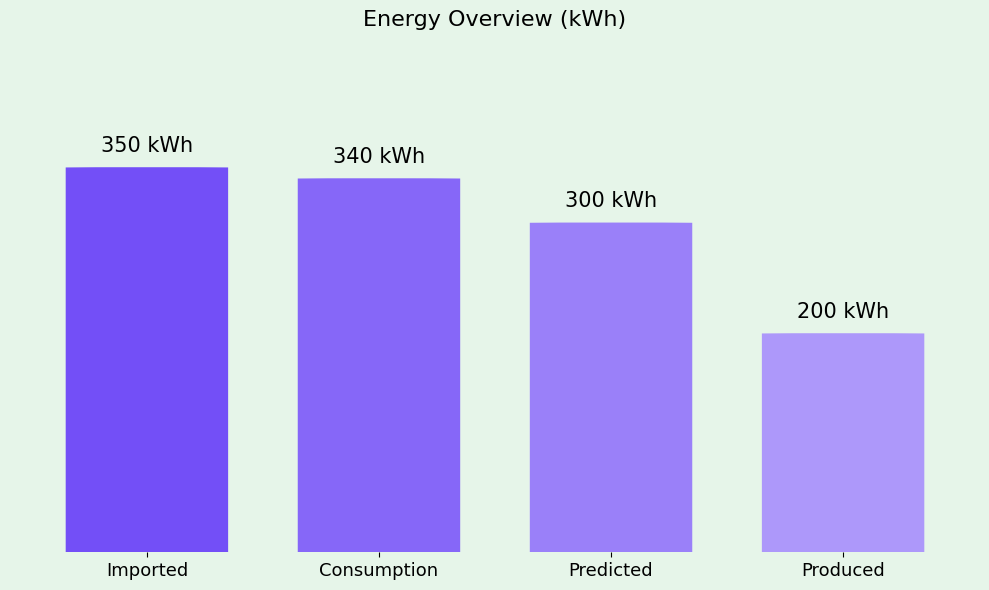

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyBboxPatch

# === Data (kWh) ===
labels = ['Imported', 'Consumption', 'Predicted', 'Produced']
values = [350, 340, 300, 200]
insta_colors = ['#734ff7', '#8667f8', '#9a80f9', '#ad98fa']

# === Setup Figure and Axes ===
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#E6F5E9')   # Background outside plot
ax.set_facecolor('#E6F5E9')          # Inside plot area

# === Create basic bars (they will be replaced by rounded patches) ===
bars = ax.bar(range(len(values)), values, width=0.8, color=insta_colors)

# === Replace bars with rounded FancyBboxPatch ===
new_patches = []
for bar in bars:
    bb = bar.get_bbox()
    color = bar.get_facecolor()
    p_bbox = FancyBboxPatch(
        (bb.xmin, bb.ymin),
        abs(bb.width), abs(bb.height),
        boxstyle="round,pad=-0.05,rounding_size=0.50",  # Curved top
        ec="none", fc=color,
        mutation_aspect=0.5
    )
    bar.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

# === Add kWh value labels on top of bars ===
for i, (x, val, color) in enumerate(zip(range(len(values)), values, insta_colors)):
    ax.text(
        x, val + 10,
        f"{val} kWh",
        ha='center', va='bottom',
        fontsize=15,
    )

# === X-axis Labels ===
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, fontsize=13, fontfamily='sans-serif')

# === Minimal Styling ===
ax.set_title("Energy Overview (kWh)", fontsize=16)
ax.set_ylim(2, max(values) + 120)
ax.set_yticks([])
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

# === Final Layout ===
plt.tight_layout()
plt.show()
